In [1]:
! pip install pandas

In [2]:
! pip install scikit-learn

In [3]:
import pandas as pd

In [4]:
url='https://raw.githubusercontent.com/romulosilvestre/semanaclassificacao/refs/heads/master/dataset/anacondabank_credit_scoring.csv'

df=pd.read_csv(url)

df_transformado=df.copy()

df_transformado['conta_corrente'].unique()

#etapa 2 - Dicionario
dict_cc={
    '< 0 DM':1,

    '0 <= ... < 200 DM':2,
    'no checking account':3,
    '>= 200 DM / salary assignments for at least 1 year':4
}
# etapa - Mapear
# dataset['coluna'] = dataset['coluna'].map(dicionario)
df_transformado['conta_corrente'] = df_transformado['conta_corrente'].map(dict_cc)

(df_transformado['historico_credito'].unique())
dict_hc={
    'critical account/ other credits existing (not at this bank)':1,
    'existing credits paid back duly till now':2,
    'delay in paying off in the past':3,
    'no credits taken/ all credits paid back duly':4,
    'all credits at this bank paid back duly':5
}
df_transformado['historico_credito'] = df_transformado['historico_credito'].map(dict_hc)

dict_pe={
    'domestic appliances':1,
    '(vacation - does not exist?)':2,
    'radio/television':3,
    'car (new)':4,
    'car (used)':5,
    'business':6,
    'repairs':7,
    'education':8,
    'furniture/equipment':9,
    'retraining':10


}
df_transformado['proposito_emprestimo'] = df_transformado['proposito_emprestimo'].map(dict_pe)

dict_rc={
    'unknown/ no savings account':1,
    '... < 100 DM':2,
    '500 <= ... < 1000 DM ':3,
    '.. >= 1000 DM ':4,
    '100 <= ... < 500 DM':5
}
df_transformado['reserva_cc'] = df_transformado['reserva_cc'].map(dict_rc)

df_transformado['outros_fiadores'].unique()


# Dictionary
dict_ofiador_cc = {
    'none': 0,
    'guarantor': 1,
    'co-applicant': 2

}

df_transformado['outros_fiadores'] = df_transformado['outros_fiadores'].map(dict_ofiador_cc)

df_transformado['outros_planos_financiamento'].unique()

dict_opf = {
    'none': 1,
    'bank': 2,
    'stores': 3,
    
}
df_transformado['outros_planos_financiamento'] = df_transformado['outros_planos_financiamento'].map(dict_opf)

df_transformado['propriedade'].unique()
dict_cc_prop = {
    'real estate': 1,
    'if not A121 : building society savings agreement/ life insurance': 2,
    'unknown / no property': 3,
    'if not A121/A122 : car or other, not in attribute 6': 4
}


df_transformado['propriedade'] = df_transformado['propriedade'].map(dict_cc_prop)

df_transformado['telefone'].unique()

dict_telefone = {
    'yes, registered under the customers name ':1,
    'none':0,
}

df_transformado['telefone'] = df_transformado['telefone'].map(dict_telefone)


df_transformado['trabalhador_estrangeiro'].unique()


dict_trabalhador_estrangeiro = {
    'yes':1,
    'no':0,
}

df_transformado['trabalhador_estrangeiro'] = df_transformado['trabalhador_estrangeiro'].map(dict_trabalhador_estrangeiro)

df_transformado['tipo_residencia'].unique()


dict_res = {
    'own':1,
    'for free':2,
    'rent':3,
}

df_transformado['tipo_residencia'] = df_transformado['tipo_residencia'].map(dict_res)

df_transformado['status_emprego'].unique()

dict_status = {
    'skilled employee / official':1,
    'unskilled - resident':2,
    'management/ self-employed/ highly qualified employee/ officer':3,
    'unemployed/ unskilled - non-resident':4
}


df_transformado['status_emprego'] = df_transformado['status_emprego'].map(dict_status)

df_transformado['tempo_emprego_atual'].unique()
dict_cc={
        '.. >= 7 years':1,
        '1 <= ... < 4 years':2,
        '4 <= ... < 7 years':3,
        'unemployed':4,
        '... < 1 year ':5

    }
df_transformado['tempo_emprego_atual'] = df_transformado['tempo_emprego_atual'].map(dict_cc)


df_transformado['sexo_est_civil'].unique()
dict_cc={
    'male : single':1,
    'female : divorced/separated/married':2,
     'male : divorced/separated':3,
     'male : married/widowed':4
}
df_transformado['sexo_est_civil'] = df_transformado['sexo_est_civil'].map(dict_cc)
df_transformado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   default                      1000 non-null   int64
 1   conta_corrente               1000 non-null   int64
 2   prazo_emprestimo_meses       1000 non-null   int64
 3   historico_credito            1000 non-null   int64
 4   proposito_emprestimo         1000 non-null   int64
 5   valor_emprestimo             1000 non-null   int64
 6   reserva_cc                   1000 non-null   int64
 7   tempo_emprego_atual          1000 non-null   int64
 8   taxa_comp_salario            1000 non-null   int64
 9   sexo_est_civil               1000 non-null   int64
 10  outros_fiadores              1000 non-null   int64
 11  anos_residencia_atual        1000 non-null   int64
 12  propriedade                  1000 non-null   int64
 13  idade                        1000 non-null   int6

In [6]:
df_transformado.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,1,1169,1,1,4,1,...,4,1,67,1,1,2,1,1,1,1
1,1,2,48,2,1,5951,2,2,2,2,...,2,1,22,1,1,1,1,1,0,1
2,0,3,12,1,2,2096,2,3,2,1,...,3,1,49,1,1,1,2,2,0,1
3,0,1,42,2,3,7882,2,3,2,1,...,4,2,45,1,2,1,1,2,0,1
4,1,1,24,3,4,4870,2,2,3,1,...,4,3,53,1,2,2,1,2,0,1


In [7]:
# 0 - não aprovado
# 1 - aprovado
df_transformado['default']

0      0
1      1
2      0
3      0
4      1
      ..
995    0
996    0
997    0
998    1
999    0
Name: default, Length: 1000, dtype: int64

In [8]:
df.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [9]:
dict_cc

{'male : single': 1,
 'female : divorced/separated/married': 2,
 'male : divorced/separated': 3,
 'male : married/widowed': 4}

In [10]:
! pip install scikit-learn

# Criando o modelo preditivo

In [11]:
# Definir o nosso X (dados)
X = df_transformado.drop(columns='default')


In [12]:
# Definir o nosso y (rótulos/classes/target/variável alvo/variável categorica)
# variável para prever o futuro
y = df_transformado['default'] 

In [13]:
# importar
from sklearn.model_selection import train_test_split
# criar constante SEED
SEED = 77
 
# definir variáveis             #chamar o método
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.30,
                                                 random_state=SEED)

In [14]:
# importar
from sklearn.linear_model import LogisticRegression

In [15]:
# criar um objeto da classe LogisticRegression
modelo = LogisticRegression(max_iter=5000)

In [16]:
# Treinar
modelo.fit(X_train,y_train)

LogisticRegression(max_iter=5000)

# Métricas

In [17]:
# 1 - acurácia de treino
print(f"acurácia de treino: {modelo.score(X_train,y_train):.2f}")

acurácia de treino: 0.75


In [18]:
# 2 - acurácia de teste 
# modelo traz as previsões dos dados
previsoes = modelo.predict(X_test) 
# import métricas do sklearn
from sklearn.metrics import accuracy_score
# definindo a acurácia
acuracia = accuracy_score(y_test,previsoes)
# mostro a variável
print(f"acurácia de teste: {acuracia * 100:.2f} %")

acurácia de teste: 75.67 %


# Matriz Confusão

In [18]:
# instalar matplotlib
! pip install matplotlib

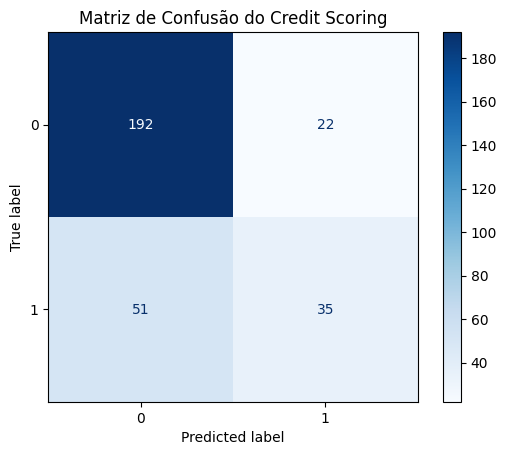

In [20]:
# importar matplotlib
import matplotlib.pyplot as plt
# importar ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay
# fazendo a previsão com o modelo treinado usando dados de teste
y_pred = modelo.predict(X_test)
# Criando a matriz confusão
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap='Blues')
# Adicionar um título
plt.title('Matriz de Confusão do Credit Scoring')
# Mostrar
plt.show()

# Considerações da Matriz Confusão

- Matriz 2x2 
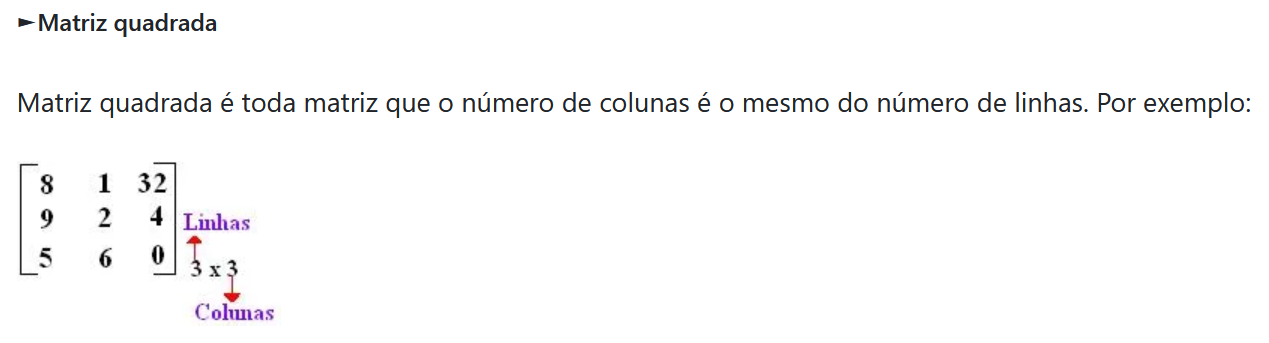

- Quadrantes
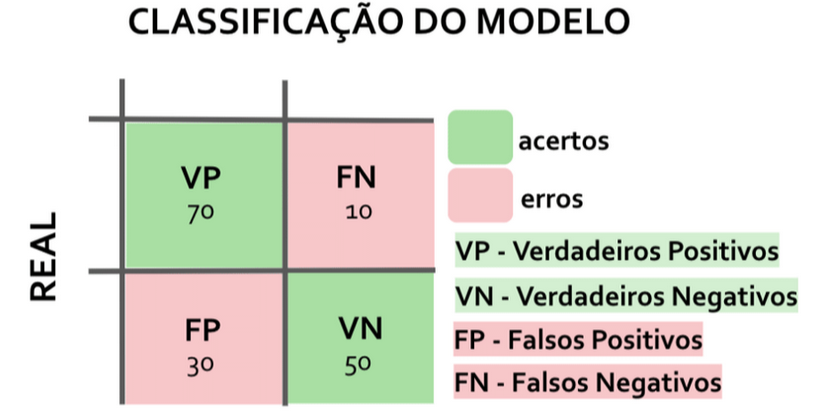

# Exerício

Quais as fórmulas considerando a matriz de  confusão, que fazem parte do classification report?

Exercício

In [ ]:
# Gerar o Classification Report

# Classification Report

- Como gerar o classification report
- Criando as fórmulas manualmente no Python
- Entender o significado de cada informações no classification report

1. Acurácia:
   Acurácia = (VP + VN) / (VP + VN + FP + FN)

2. Precisão:
   Precisão = VP / (VP + FP)

3. Recall (Sensibilidade):
   Recall = VP / (VP + FN)

4. F1-Score:
   F1 = 2 * (Precisão * Recall) / (Precisão + Recall)

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,previsoes))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       214
           1       0.61      0.41      0.49        86

    accuracy                           0.76       300
   macro avg       0.70      0.65      0.66       300
weighted avg       0.74      0.76      0.74       300



Acurácia (Accuracy):

    Medida que indica a proporção de previsões corretas, tanto verdadeiros positivos (TP) quanto verdadeiros negativos (TN), em relação ao total de previsões.

Precisão (Precision):

    Mede a proporção de previsões corretas para a classe positiva em relação ao total de previsões feitas para essa classe.

Recall (Sensibilidade):

    Mede a capacidade do modelo de identificar corretamente as instâncias da classe positiva

F1-Score:

    Combina precisão e recall em uma única métrica, sendo especialmente útil quando há um desequilíbrio entre as classes.

# Curva ROC (amanhã)
- Rafael


# Agora é com a Turma

- DataSet ou Banco de Dados
- EDA (análise exploratória de dados)
- Engenharia de Variáveis (entender variável a variável do seu dataset)
- Implemente uma Regressão Linear ou Logística
- Ser for logistica implemente uma matriz de confusão e um classification report
- Se for linear implemente um gráfico de dispersão
- Aplicar recursos do curso anterior : Estatística, Gráfico, BoxPlot , Banco de Dados, Flask ...
- Aplicar Streamlit

In [ ]:
dict_datasets = {

   vitoria: "limpeza urbana - banco de dados",
   sueli: "dataset ok",
   claudio: "saude mental em trabalho em hospitais - serviço gerais",
   giovana:"vai começar do zero",
   brenda:"dataset ok",
   bruno:"dataset ok",
   elias:"859 linhas",
   rafael:"859 linhas",
   alice:"mesmo"


}

# Iniciando com a curva ROC

- Além da precisão, do recall e do F1-score, que são métricas derivadas da matriz confusão, podemos gerar um gráfico que vem da própria matriz.
- E é também muito relevante na hora de decidir o melhor modelo, que será usado como motor de concessão de crédito pelo AnacondaBank.
- Esse gráfico é chamado de curva ROC.
- Ele é muito importante, porque traz uma nova perspectiva e novos argumentos sobre a calibragem da nossa regressão logística do nosso modelo de classificação.
- Para poder plotar esse gráfico, vamos usar duas funções do Scikit-learn:
1) roc_curve 
2) roc auc score



# Mas para que serve uma curva ROC?

- É um recurso que auxilia na avaliação do desempenho do modelo a partir da relação entre a taxa de verdadeiros positivos (sensibilidade) e a taxa de falsos positivos (especificidade) para diferentes limites.